# Machine Learning Utils - Regression example

###### House prices dataset (Kaggle)  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### 0 - Setup

In [1]:
from ml_utils import *
import warnings
warnings.filterwarnings("ignore")

C:\profili\u382270\Downloads\MyStuff\anaconda2\envs\env1\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
dtf = pd.read_csv("data_houses.csv")
dtf = dtf[dtf.columns.tolist()[0:12]+dtf.columns.tolist()[-1:]]
dtf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,250000


shape: (1460, 13)
Id --> Nas: 0 (0.0%)
    # possible pk
MSSubClass --> Nas: 0 (0.0%)
MSZoning --> Nas: 0 (0.0%)
LotFrontage --> Nas: 259 (17.7%)
LotArea --> Nas: 0 (0.0%)
Street --> Nas: 0 (0.0%)
Alley --> Nas: 1369 (93.8%)
LotShape --> Nas: 0 (0.0%)
LandContour --> Nas: 0 (0.0%)
Utilities --> Nas: 0 (0.0%)
LotConfig --> Nas: 0 (0.0%)
LandSlope --> Nas: 0 (0.0%)
SalePrice --> Nas: 0 (0.0%)


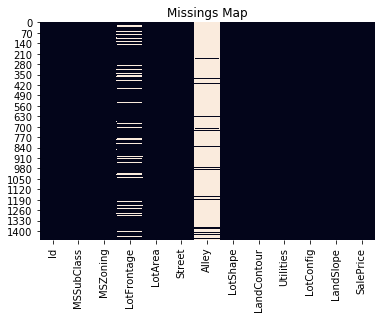

In [3]:
check_Nas(dtf, plot="map")

### 1 - Data Analysis

###### Group variables by type
- pk: Id
- y: SalePrice
- num: LotFrontage, LotArea
- cat: MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope

In [4]:
features = []

###### Target Variable

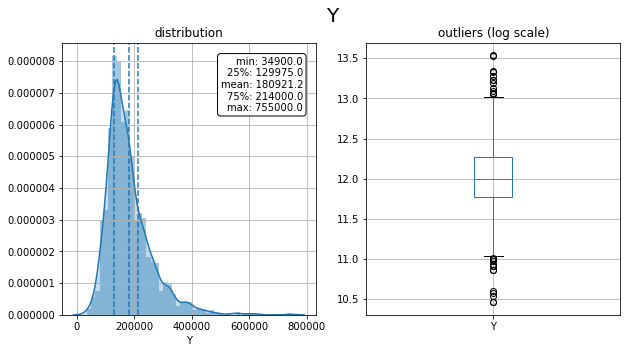

In [5]:
dtf = dtf.rename(columns={"SalePrice":"Y"})

freqdist_plot(dtf, "Y", box_logscale=True, figsize=(10,5))

In [6]:
#-> Average House price: 180,921

###### Numeric

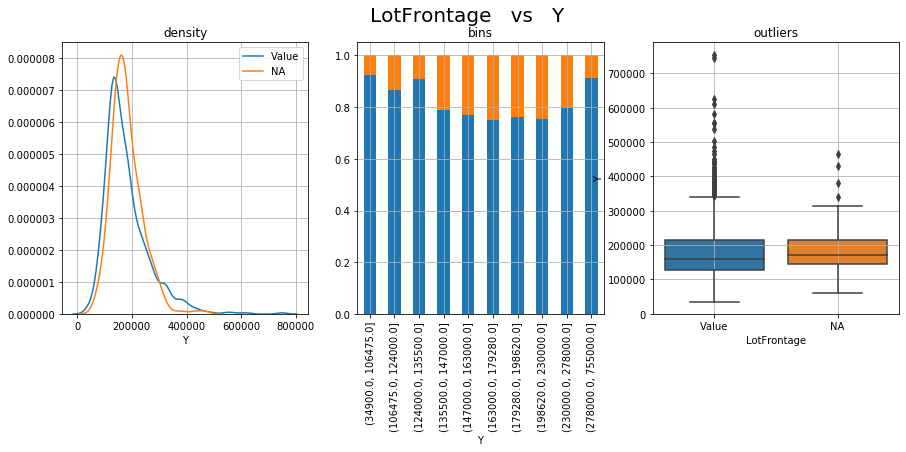

In [7]:
#--- LotFrontage ---#
nan_analysis(dtf, na_x="LotFrontage", y="Y", max_cat=20, figsize=(15,5))

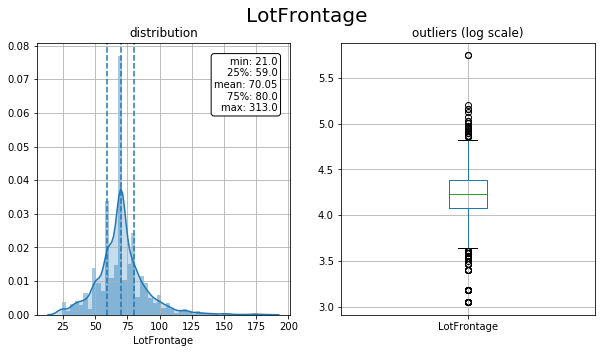

In [8]:
freqdist_plot(dtf, "LotFrontage", box_logscale=True, figsize=(10,5))

In [9]:
dtf["LotFrontage"] = dtf["LotFrontage"].fillna( dtf["LotFrontage"].mean() )

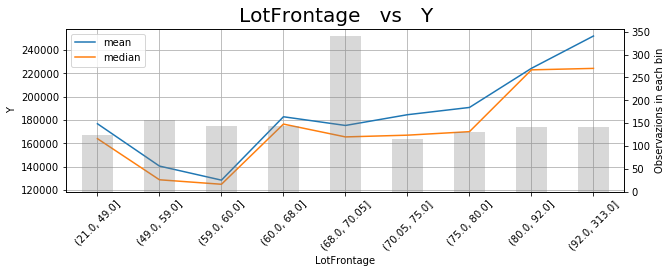

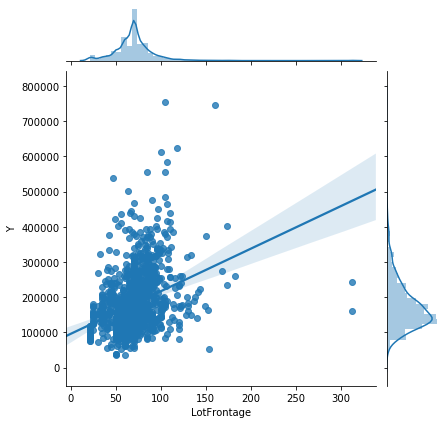

In [10]:
bivariate_plot(dtf, x="LotFrontage", y="Y", figsize=(10,3))

In [11]:
#-> LotFrontage is Predictive: the larger is the street connected to property the higher is the house price.
features.append("LotFrontage")

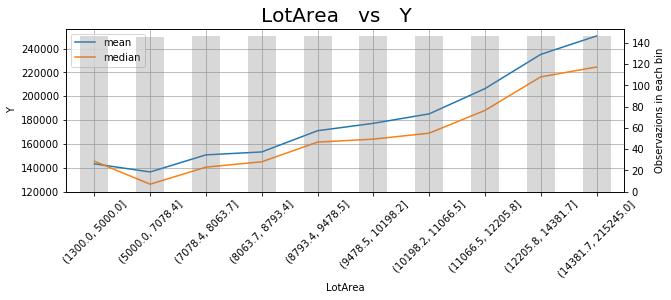

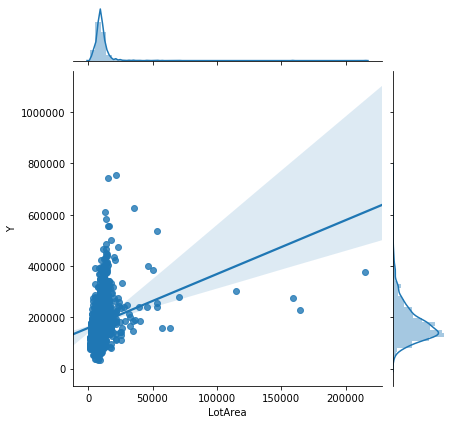

In [12]:
#--- LotArea ---#
bivariate_plot(dtf, x="LotArea", y="Y", figsize=(10,3))

In [13]:
#-> LotArea is Predictive: the larger is the lot area the higher is the house price.
features.append("LotArea")

###### Categorical

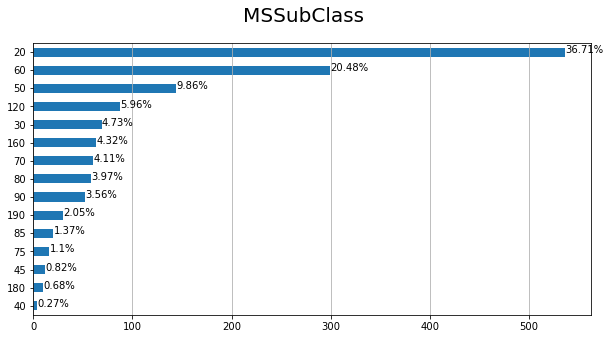

In [14]:
#--- MSSubClass ---#
freqdist_plot(dtf, "MSSubClass", figsize=(10,5))

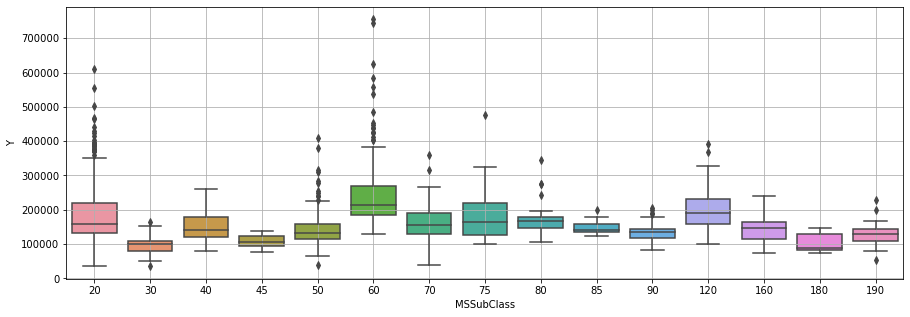

In [15]:
# this variable is tricky as it has 15 classes, so I will plot manually in a unique big boxplot
fig, ax = plt.subplots(figsize=(15,5))
sns.catplot(x="MSSubClass", y="Y", data=dtf, kind="box", ax=ax)
ax.grid(True)
plt.close()

In [16]:
MSSubClass_clusters = {"min":[30,45,180], "max":[60,120], "mean":[]}

dtf = add_feature_clusters(dtf, "MSSubClass", dic_cluters=MSSubClass_clusters, dropx=False)

dtf[["Id","MSSubClass","MSSubClass_cluster","Y"]].head()

,Id,MSSubClass,MSSubClass_cluster,Y
0,1,60,max,208500
1,2,20,mean,181500
2,3,60,max,223500
3,4,70,mean,140000
4,5,60,max,250000


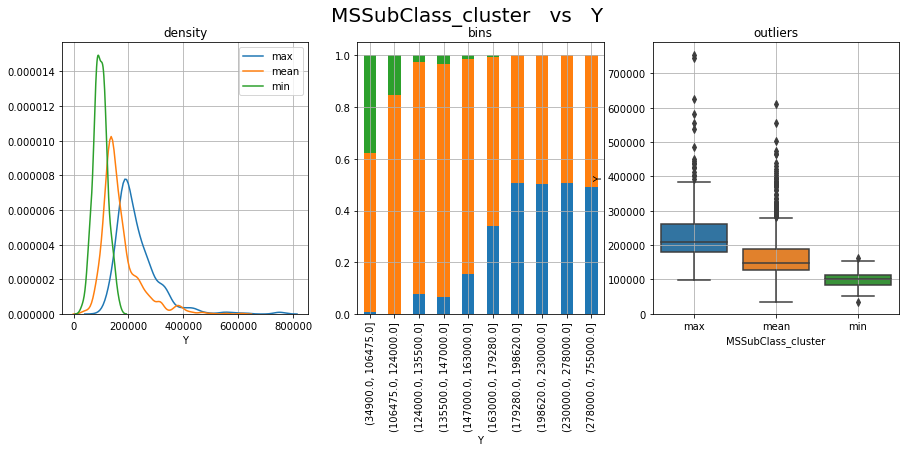

In [17]:
bivariate_plot(dtf, x="MSSubClass_cluster", y="Y", figsize=(15,5))

In [18]:
#-> MSSubClass_cluster is Predictive: different lot classes (clusters) lead to different house prices.
features.append("MSSubClass_cluster")

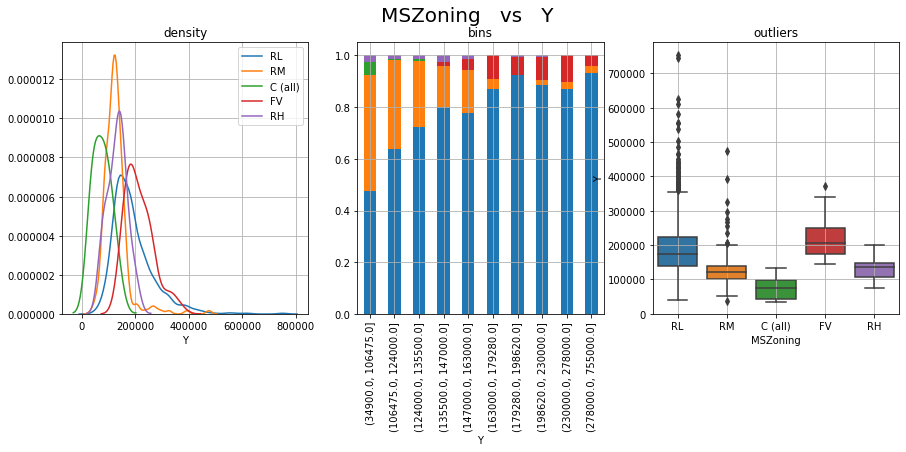

In [19]:
#--- MSZoning ---#
bivariate_plot(dtf, x="MSZoning", y="Y", figsize=(15,5))

In [20]:
#-> MSZoning is Predictive: different zones have different price distributions.
features.append("MSZoning")

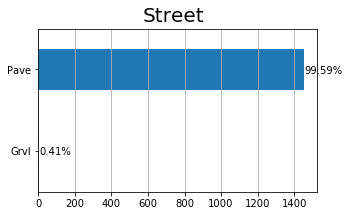

In [21]:
#--- Street ---#
freqdist_plot(dtf, "Street", figsize=(5,3))

In [22]:
#-> Street is useless

In [23]:
#--- Alley ---#
#-> Alley is useless (96% of Nan)

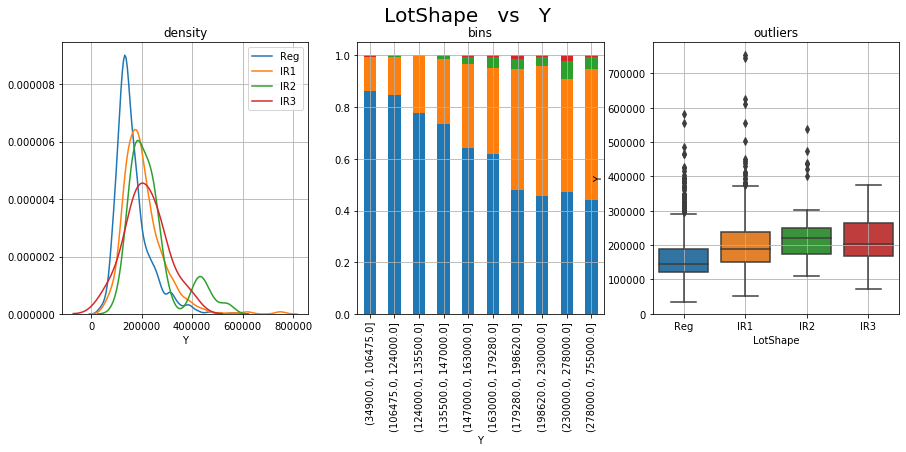

In [24]:
#--- LotShape ---#
bivariate_plot(dtf, x="LotShape", y="Y", figsize=(15,5))

In [25]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LotShape", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [26]:
#-> LotShape is predictive: for sure IR2 has a different distribution and higher prices, while Reg has lower prices. 
# Plus the correlation test had a positive result, thus I'll keep the variable for now.
features.append("LotShape")

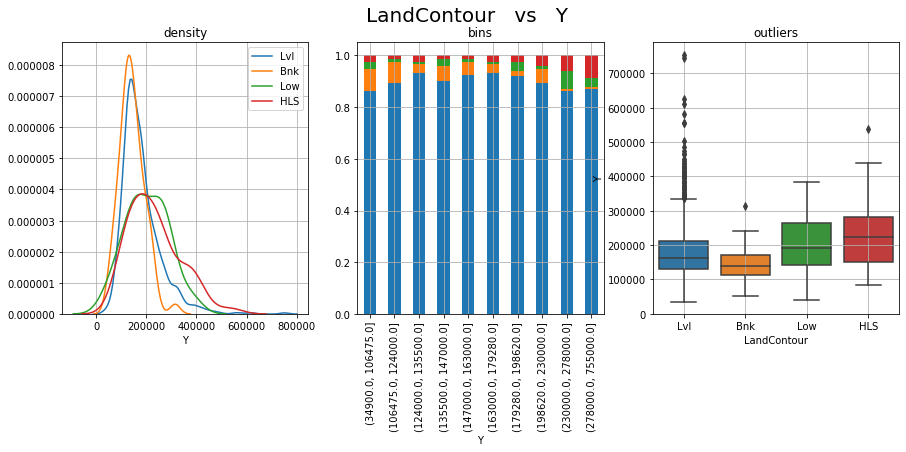

In [27]:
#--- LandContour ---#
bivariate_plot(dtf, x="LandContour", y="Y", figsize=(15,5))

In [28]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LandContour", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [29]:
#-> LandContour is predictive.
features.append("LandContour")

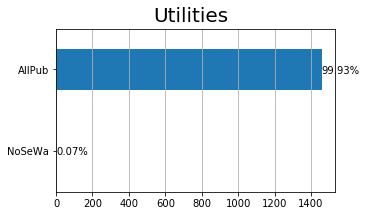

In [30]:
#--- Utilities ---#
freqdist_plot(dtf, "Utilities", figsize=(5,3))

In [31]:
#-> Utilities is useless

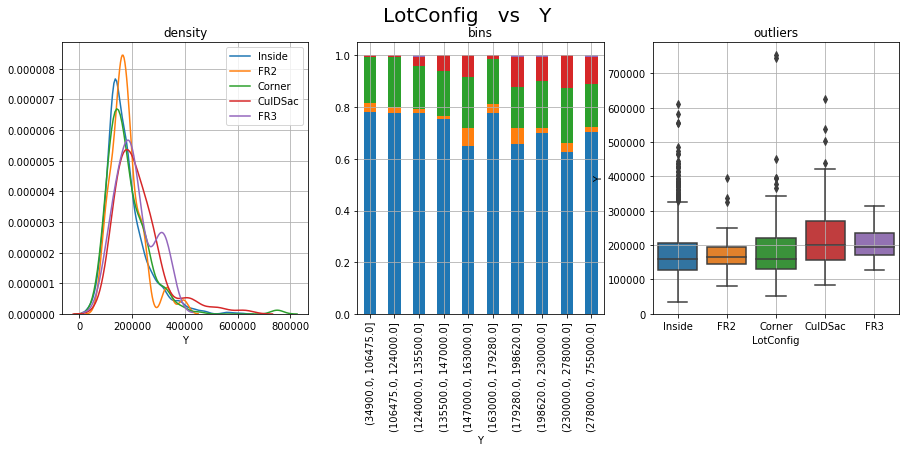

In [32]:
#--- LotConfig ---#
bivariate_plot(dtf, x="LotConfig", y="Y", figsize=(15,5))

In [33]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LotConfig", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [34]:
#-> LotConfig is predictive.
features.append("LotConfig")

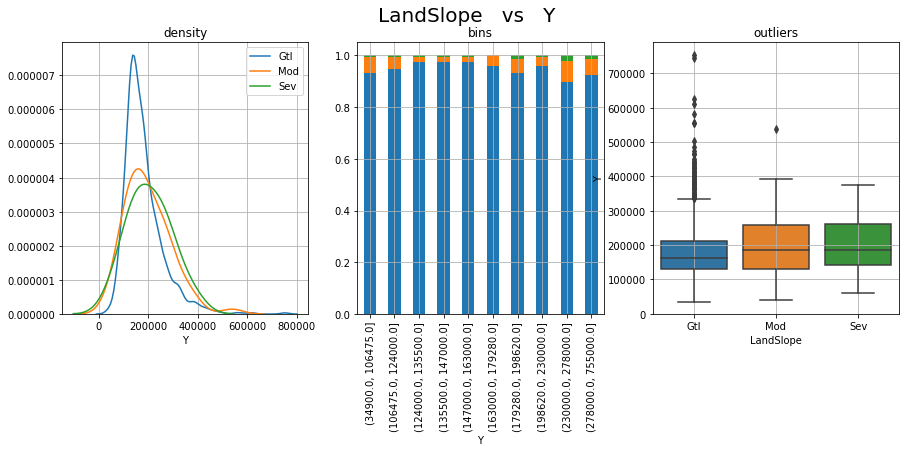

In [35]:
#--- LandSlope ---#
bivariate_plot(dtf, x="LandSlope", y="Y", figsize=(15,5))

In [36]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LandSlope", y="Y")

Anova F: the variables are Non-Correlated (p-value: 0.141)


In [37]:
#-> LandSlope is useless

###### Summary

In [38]:
dtf = dtf[["Id"]+features+["Y"]]
dtf.head()

,Id,LotFrontage,LotArea,MSSubClass_cluster,MSZoning,LotShape,LandContour,LotConfig,Y
0,1,65.0,8450,max,RL,Reg,Lvl,Inside,208500
1,2,80.0,9600,mean,RL,Reg,Lvl,FR2,181500
2,3,68.0,11250,max,RL,IR1,Lvl,Inside,223500
3,4,60.0,9550,mean,RL,IR1,Lvl,Corner,140000
4,5,84.0,14260,max,RL,IR1,Lvl,FR2,250000


### 2 - Preprocessing

In [39]:
check = data_preprocessing(dtf, pk="Id", y="Y", task="regression",
                           processNas=None, processCategorical=None, split=None, scale=None)

--- check missing ---
   OK: No missing
--- check categorical data ---
--- split train/test ---
   OK: skipped this step
--- scaling ---
   OK: skipped this step


###### Nas

In [ ]:
# ok, no missings

###### Categorical

In [40]:
dtf = add_dummies(dtf, x="MSSubClass_cluster", dropx=True)

In [41]:
dtf = add_dummies(dtf, x="MSZoning", dropx=True)

In [42]:
dtf = add_dummies(dtf, x="LotShape", dropx=True)

In [43]:
dtf = add_dummies(dtf, x="LandContour", dropx=True)

In [44]:
dtf = add_dummies(dtf, x="LotConfig", dropx=True)

### 3 - Baseline (linear regression)

###### Plan:
- Feature Selection: by correlation, by p-value, by importance
- Partitioning train/test
- Train model
- Evaluate and Visualization
- Explainer

###### Features Selection

In [ ]:
#--- correlation ---#
corr = corrmatrix_plot(dtf.drop("Id",axis=1), method="pearson", annotation=True, figsize=(15,7))

In [ ]:
#--- p values ---#
dic_feat_sel = features_selection(dtf.drop("Id",axis=1), y="Y", task="regression", top=10, figsize=(10,5))

In [ ]:
# -> selection
selected_features = []

In [ ]:
dtf_reduced = dtf[["Id"]+selected_features+["Y"]] if len(selected_features)>0 else dtf
dtf_reduced.head()

###### Partitioning + Scaling

In [48]:
dic_data = data_preprocessing(dtf, pk="Id", y="Y", task="regression",
                              processNas=None, processCategorical=None, split=0.3, scale="minmax")

X_names = dic_data["X_names"]
X_train, X_test = dic_data["X"]
Y_train, Y_test = dic_data["Y"]
scalerX, scalerY = dic_data["scaler"]

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
X_train shape: (1022, 18)  | X_test shape: (438, 18)
18 features: ['LotFrontage', 'LotArea', 'MSSubClass_cluster_mean', 'MSSubClass_cluster_min', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside']
--- scaling ---
   OK: scaled all features


###### Train

###### Evaluate

###### Explainability

###### Visualize predictions

### 4 - Model Desing & Testing (neural network)

###### Train

###### Evaluate